In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn import datasets
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error

from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/Datasets/cancer.csv'
dataset = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
dataset = datasets.load_breast_cancer()
input = pd.DataFrame(dataset.data)
input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [115]:
#creates labels used from dataset
labels = dataset.target
labels = np.reshape(labels,(569,1))
cancer = np.concatenate([input,labels],axis=1)

In [116]:
#Used to create map that allows features to be on coloums

cancer = pd.DataFrame(cancer)
features = dataset.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [117]:
features_label = np.append(features,'test')
cancer.columns = features_label
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,test
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [118]:
X = cancer.iloc[:,:30]
Y = cancer.iloc[:,30].values

#Standardize
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#Split
cancerX_train, cancerX_test, cancerY_train, cancerY_test = train_test_split(X, Y,test_size = 0.2, random_state = 0)

classifier = SVC(kernel = 'rbf', class_weight='balanced', C=10)
#classifier = SVC(kernel = 'linear', class_weight='balanced', C=10)
#classifier = SVC(kernel = 'poly', class_weight='balanced', C=10)
classifier.fit(cancerX_train,cancerY_train)

SVC(C=10, class_weight='balanced')

In [119]:
Y_pred = classifier.predict(cancerX_test)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [120]:
cm = np.array(confusion_matrix(cancerY_test,Y_pred,labels=[1,0]))
cnf_matrix = pd.DataFrame(cm,index =['Malignant', 'Benign'],columns=['predicted with Malignant','predicted with Benign'])
cnf_matrix

,predicted with Malignant,predicted with Benign
Malignant,65,2
Benign,1,46


<Axes: >

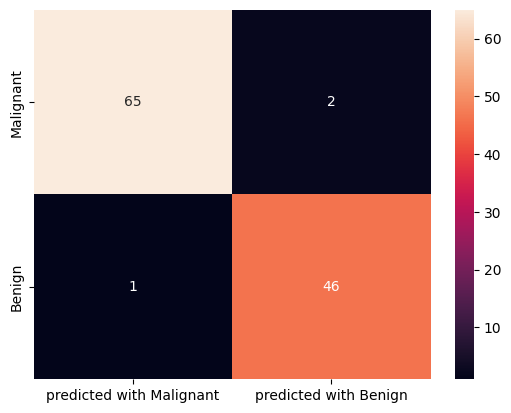

In [121]:
sns.heatmap(cnf_matrix,annot=True)

In [122]:
print(classification_report(cancerY_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        47
         1.0       0.98      0.97      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [123]:

#Metrics for accuracy precision recall and average used from HW3
accuracy = metrics.accuracy_score(cancerY_test, Y_pred)
precision = metrics.precision_score(cancerY_test, Y_pred)
recall = metrics.recall_score(cancerY_test, Y_pred)
average = (accuracy+precision+recall)/3
#print the accuracy, precision, recall, and average
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Average:",average)


Accuracy: 0.9736842105263158
Precision: 0.9848484848484849
Recall: 0.9701492537313433
Average: 0.9762273163687146


In [124]:
#for PCA
x = cancer.loc[:,features].values
y = cancer.loc[:,['test']].values
x = StandardScaler().fit_transform(x)
#graphs for the metrics
accuracyGraph = []
precisionGraph = []
recallGraph = []

In [125]:
#K for loop in range from 1 to 31
for k in range(1, 31):
      #PCA used from HW 3
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
    finalDf = pd.concat([principalDf, cancer[['test']]], axis = 1)
    outcome = finalDf.pop("test")

    x2 = finalDf.values
    y2 = outcome.values

    cancerX_train, cancerX_test, cancerY_train, cancerY_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 4)

    classifier.fit(cancerX_train, cancerY_train)
    Y_pred = classifier.predict(cancerX_test)
    cnf_matrix = confusion_matrix(cancerY_test, Y_pred)

    accuracy = metrics.accuracy_score(cancerY_test, Y_pred)
    precision = metrics.precision_score(cancerY_test, Y_pred)
    recall = metrics.recall_score(cancerY_test, Y_pred)

    accuracyGraph.append(accuracy)
    precisionGraph.append(precision)
    recallGraph.append(recall)

    New_average = (accuracy + precision + recall)/3
    print(New_average)
    if average < New_average:
        average = New_average
        index = k

0.9214747549625236
0.9143170426065165
0.9220029239766081
0.9432748538011696
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.964546783625731
0.964546783625731
0.964546783625731
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.9787280701754386
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849
0.9716374269005849


In [126]:
Y_pred = classifier.predict(cancerX_test)
cnf_matrix = confusion_matrix(cancerY_test, Y_pred)

#Metrics
print("Accuracy:",metrics.accuracy_score(cancerY_test,Y_pred))
print("Precision:",metrics.precision_score(cancerY_test,Y_pred))
print("Recall:",metrics.recall_score(cancerY_test,Y_pred))
print("Final k: ", k)

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.95
Final k:  30


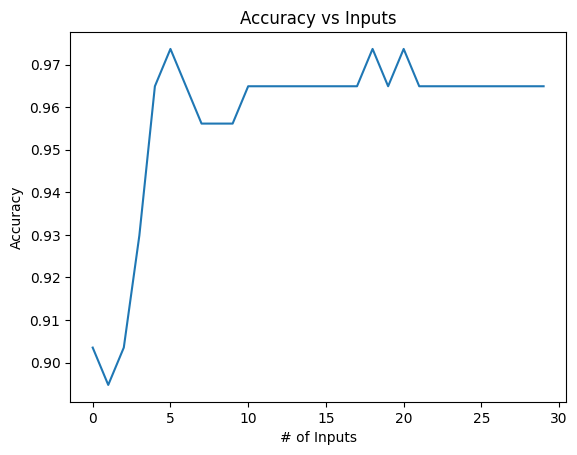

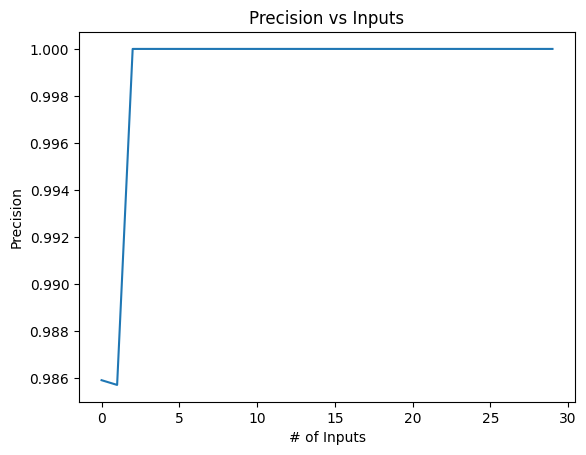

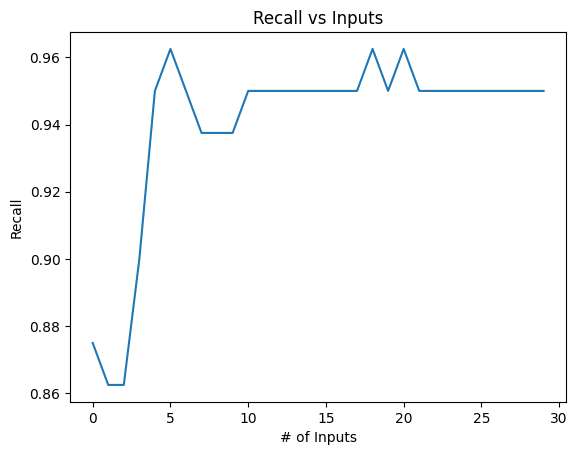

In [127]:
#Graphs for the question
#Accuracy Graph
plt.plot(accuracyGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Inputs')
plt.show()
#Precision Graph
plt.plot(precisionGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Precision')
plt.title('Precision vs Inputs')
plt.show()
#Recall Graph
plt.plot(recallGraph)
plt.xlabel('# of Inputs')
plt.ylabel('Recall')
plt.title('Recall vs Inputs')
plt.show()

In [128]:
#PCA used from HW3
pca = PCA(n_components=k)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
final_df =pd.concat([principalDf, cancer[['test']]], axis=1)
#obtainings the values from the varibales using classifier
x2 = final_df.values
y2 = outcome.values
cancerX_train, cancerX_test, cancerY_train, cancerY_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)
classifier.fit(cancerX_train, cancerY_train)
Y_pred = classifier.predict(cancerX_test)
cnf_matrix = confusion_matrix(cancerY_test, Y_pred)
#metrics for accuracy precision recall
accuracy = metrics.accuracy_score(cancerY_test, Y_pred)
precision = metrics.precision_score(cancerY_test, Y_pred)
recall = metrics.recall_score(cancerY_test, Y_pred)

In [129]:
print(metrics.classification_report(cancerY_test, Y_pred))
print(metrics.confusion_matrix(cancerY_test, Y_pred))



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        67

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[47  0]
 [ 0 67]]


In [130]:
#Problem 2
##making new file path for Housing dataset

file_path = '/content/drive/MyDrive/Datasets/Housing.csv'
df = pd.DataFrame(pd.read_csv(file_path))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [131]:
#using clean data command to turn column titles into a seperate list and return type of each column
def clean_data(df):
    temp = df
    x = df.columns.tolist()   #turns the column titles into a list
    types = df.dtypes           #returns the type of each column
    for i in range(len(x)):
        if types[i] == 'str' or types[i] == 'object':
            temp[x[i]] = df[x[i]].astype('category').cat.codes
        else:
            temp[x[i]] = df[x[i]]
    return temp

df = clean_data(df)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [132]:
#making a varlist of the require colums for the question

varlist = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad','guestroom','basement', 'hotwaterheating','airconditioning','parking','prefarea']
X = df[varlist]
Y = df.loc[:, df.columns == 'price']

#Standardizing the data using standard sclaer
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_Y = StandardScaler()
Y = sc_Y.fit_transform(Y)

#Splitting up the data
houseX_train, houseX_test, houseY_train, houseY_test = train_test_split(X, Y, train_size=0.8, test_size=.2, random_state = 0)

In [133]:
svr_lin = SVR(kernel='linear', C=10.0)
Y_LIN = svr_lin.fit(houseX_train, houseY_train).predict(houseX_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
print('Test R^2     : %.3f'%r2_score(houseY_test, Y_LIN))
print('Test R^2     : %.3f'%svr_lin.score(houseX_test, houseY_test))
print('Training R^2 : %.3f'%svr_lin.score(houseX_train, houseY_train))
R2 = svr_lin.score(houseX_train,houseY_train)

Test R^2     : 0.671
Test R^2     : 0.671
Training R^2 : 0.662


In [135]:
print('Test MSE  : %.3f'%mean_squared_error(houseY_test, Y_LIN))
print('Train MSE : %.3f'%mean_squared_error(houseY_train, svr_lin.predict(houseX_train)))

Test MSE  : 0.271
Train MSE : 0.352


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

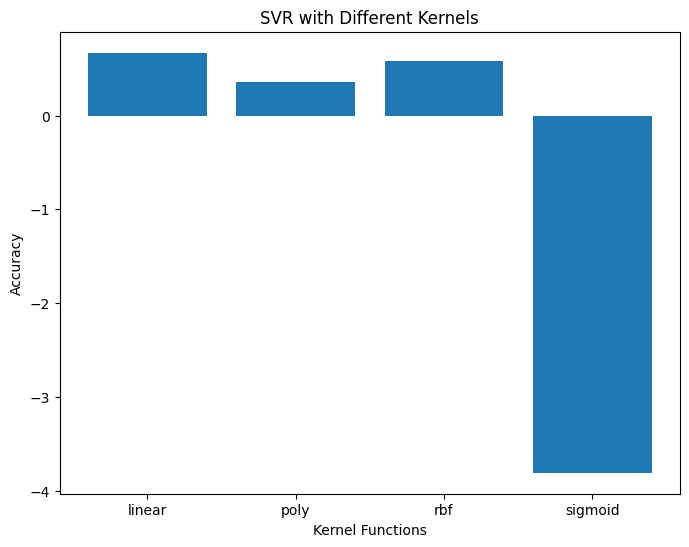

In [136]:
svr_model_pca = SVR(kernel='rbf')  # Using RBF kernel
svr_model_pca.fit(houseX_train, houseY_train)
y_pred_svr_pca = svr_model_pca.predict(houseX_train)

# 5) Exploring different kernel tricks in SVR
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    model = SVR(kernel=kernel)
    model.fit(houseX_train, houseY_train)
    accuracy = model.score(houseX_test, houseY_test)
    accuracies.append(accuracy)

    # Plotting results and accuracies for different kernels
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')
plt.title('SVR with Different Kernels')
plt.show()

In [137]:
X  = df[varlist]
Y = df.loc[:, df.columns == 'price']
X  = StandardScaler().fit_transform(X)
Y = StandardScaler().fit_transform(Y)
Y = Y.flatten()
Y_Series = pd.Series(Y)

In [138]:
#using the kernel and C=10

classifier = SVR(kernel = 'linear', C= 5)
#using the graph train and pred and test
r2GraphTrain = []
r2GraphPred = []
r2GraphTest = []

In [139]:
#PCA
for k in range(1, 12):
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents, columns = [*range(1,k+1)])
    finalDf = pd.concat([principalDf, Y_Series], axis = 1)
    outcome = finalDf.pop(1)

    x2 = finalDf.values
    y2 = outcome.values
    houseX_train, houseX_test, houseY_train, houseY_test = train_test_split(x2, y2, train_size=0.8, test_size = 0.2, random_state = 0)

    classifier.fit(houseX_train, houseY_train)
    Y_pred = classifier.predict(houseX_test)

    # Variables to hold the Accuracy, Precision, and Recall
    newerR2= classifier.score(houseX_train, houseY_train)
    R2predict = r2_score(houseY_test, Y_pred)
    R2testing = classifier.score(houseX_test, houseY_test)
    # Saving the values to the appropriate list
    r2GraphTest.append(R2testing)
    r2GraphTrain.append(newerR2)
    r2GraphPred.append(R2predict)

    # Averaging using if statement
    if  R2 < newerR2:
        R2 = newerR2
        index = k


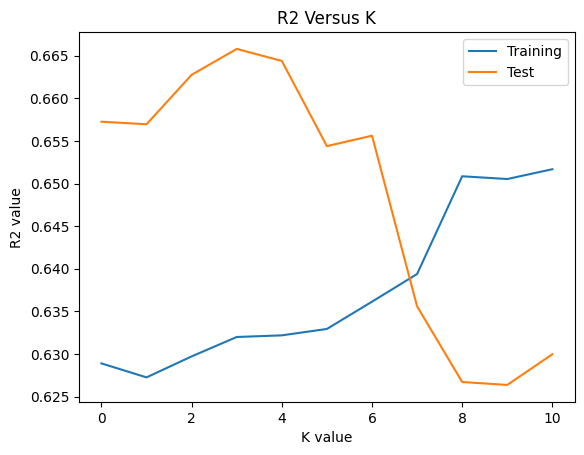

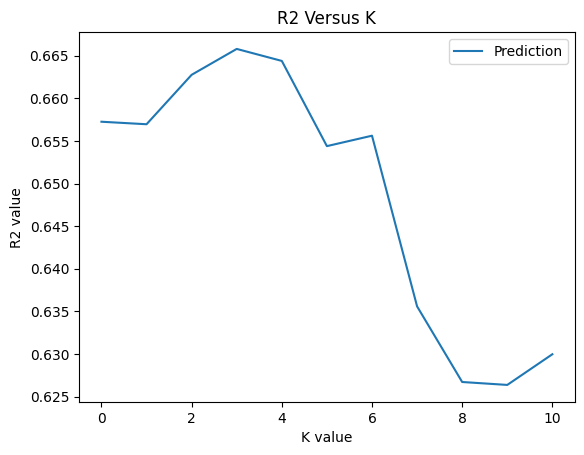

In [140]:
# Graph Accuracy
lw = 1.5
plt.plot(r2GraphTrain, lw = lw, label = "Training")
plt.plot(r2GraphTest, lw = lw, label = "Test")
plt.xlabel('K value')
plt.ylabel('R2 value')
plt.title('R2 Versus K')
plt.legend()
plt.show()
plt.plot(r2GraphPred, lw=lw, label = "Prediction")
plt.xlabel('K value')
plt.ylabel('R2 value')
plt.title('R2 Versus K')
plt.legend()

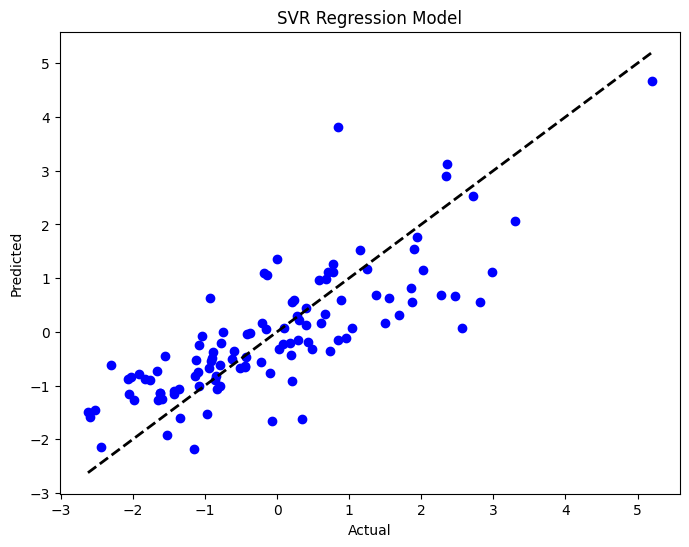

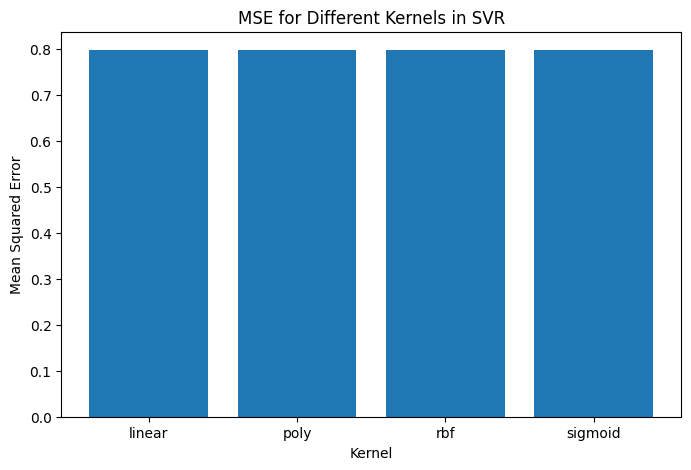

ValueError: ignored

In [143]:
plt.figure(figsize=(8, 6))
plt.scatter(houseY_test, Y_pred, color='blue')
plt.plot([houseY_test.min(), houseY_test.max()], [houseY_test.min(), houseY_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR Regression Model')
plt.show()

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mse_kernels = []

for kernel in kernels:
    svm = SVR(kernel=kernel)
    svm.fit(houseX_train, houseY_train)
    y_pred = svm.predict(houseX_test)
    mse = mean_squared_error(houseY_test, Y_pred)
    mse_kernels.append(mse)

plt.figure(figsize=(8, 5))
plt.bar(kernels, mse_kernels)
plt.title('MSE for Different Kernels in SVR')
plt.xlabel('Kernel')
plt.ylabel('Mean Squared Error')
plt.show()

ridge = Ridge(alpha=1.0)
ridge.fit(cancerX_train, cancerY_train)
y_pred_ridge = ridge.predict(cancerX_test)
mse_ridge = mean_squared_error(cancerY_test, Y_pred)
print(f"Mean Squared Error (MSE) for Ridge Regression: {mse_ridge}")

svr = SVR(kernel='linear')
svr.fit(cancerX_train, cancerY_train)
y_pred_svr = svr.predict(cancerX_test)
mse_svr = mean_squared_error(cancerY_test, Y_pred)
print(f"MSE for SVR: {mse_svr}")